### Time to get your hands dirty! The irreducible mass of Black Holes
For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 

$$ M_{\rm irr} = M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}$$

For convenience, let us define 


$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}} = \frac{M_{\rm irr}}{M}$$

Suppose you have repeated measurments of $M$ and $\chi$. This is just because we're still frequentists for now. When we will put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the distribution of $M_{\rm irr}$ using a KDE.

4. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

6. You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.


7. Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

*Hint (for point 7 above)*: First compute the pdf of $f$, that is just a change of variable. We saw how to do this in a previous lecture. The answer is:
\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

*Another hint (still for point 7 above)*: Then compute the pdf of $M_{\rm irr}$, you want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic (unless you know how to solve that integral? If so please tell me!)
$$ p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,. $$
This can be easily solved numerically.

*Yet another hint:* If any any time you get lost in the calculation, it helps checking that your pdfs are normalized as they should.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
import scipy.interpolate as interpolate
from scipy.interpolate import splev, splrep
from scipy.integrate import quad
import astropy
from astropy.visualization.hist import hist
from sklearn.neighbors import KernelDensity

### 1. Data Sampling

Here, I sample chi using a uniform distribution and M with a gaussian distribution. In particular, I do two different cases for M, one with $\sigma = 0.02$ and one with $\sigma = 2$. Then, I compute the two different distribution corresponding to $M_{irr}$ in the two cases.

In [2]:
sigma = [0.02, 2]
mean = 1
gauss_1 = scipy.stats.norm(loc = mean, scale=sigma[0])
gauss_2 = scipy.stats.norm(loc = mean, scale=sigma[1])
unif = scipy.stats.uniform()
chi = unif.rvs(1000)

masses_1 = gauss_1.rvs(1000)
cdf_masses_1 = np.arange(1, len(masses_1) + 1) / len(masses_1)
m_irr_1 = masses_1*np.sqrt((1+np.sqrt(1-chi**2))/2)

masses_2 = gauss_2.rvs(1000)
cdf_masses_2 =  np.arange(1, len(masses_2) + 1) / len(masses_2)
m_irr_2= masses_2*np.sqrt((1+np.sqrt(1-chi**2))/2)

### 2. Comparison between $\sigma$ = 0.02, $\sigma$ = 2

We can study how the distribution of $M_{\rm irr}$ changes in function of $\sigma$. In particular, we should see that it is distributed as $f$ if ${\sigma}\ll \mu$ or like $M$ if  $\sigma\gg \mu$. Fixing $\sigma = 0.02$ and $\sigma = 2$, it is possible to see this by looking at the CDF of the distributions. In fact, the KS distance - a method to compare two samples distribution - is based on the distance of the two CDFs.

#### 2.1 $M_{irr}$ distribution comparison

Here, we compute the histogram of $M_{irr}$ for both cases.

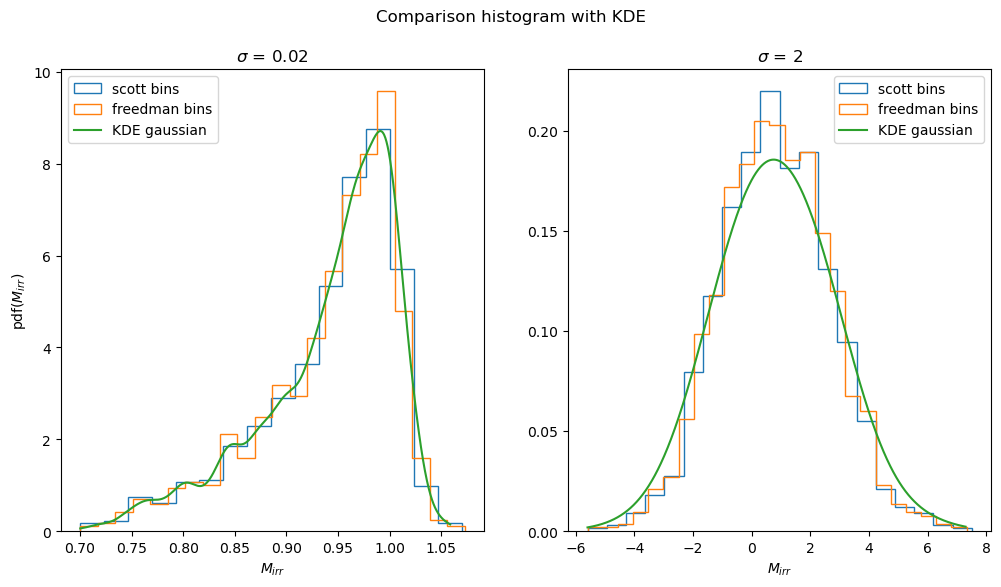

In [3]:
x_lin_1 = np.linspace(min(m_irr_1),max(m_irr_1), 1000)

fig, ax = plt.subplots(1,2, figsize = (12,6))


hist(m_irr_1, bins = 'scott',density = True, histtype = 'step', label = 'scott bins', ax = ax[0])
hist(m_irr_1, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins', ax = ax[0])
kde = KernelDensity(kernel="gaussian", bandwidth=0.01).fit(m_irr_1[:, np.newaxis])
log_pdf = kde.score_samples(x_lin_1[:, np.newaxis])
ax[0].plot(x_lin_1, np.exp(log_pdf), label = 'KDE gaussian')
ax[0].set_xlabel(r'$M_{irr}$')
ax[0].set_ylabel(r'pdf($M_{irr}$)')
ax[0].legend()
ax[0].set_title(r'$\sigma$ = ' +str(sigma[0]))

x_lin_2 = np.linspace(min(m_irr_2),max(m_irr_2), 1000)
hist(m_irr_2, bins = 'scott',density = True, histtype = 'step', label = 'scott bins', ax = ax[1])
hist(m_irr_2, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins', ax = ax[1])
kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(m_irr_2[:, np.newaxis])
log_pdf = kde.score_samples(x_lin_2[:, np.newaxis])
ax[1].plot(x_lin_2, np.exp(log_pdf), label = 'KDE gaussian')
plt.xlabel(r'$M_{irr}$')
plt.legend()
ax[1].set_title(r'$\sigma$ = ' +str(sigma[1]))
plt.suptitle('Comparison histogram with KDE')
plt.show()

#### 2.2 $M_{irr}$ CDF comparison

Then, we compute for both cases the CDFs, that we will then compare with the CDFs of $f$ and $M$ respectively.  

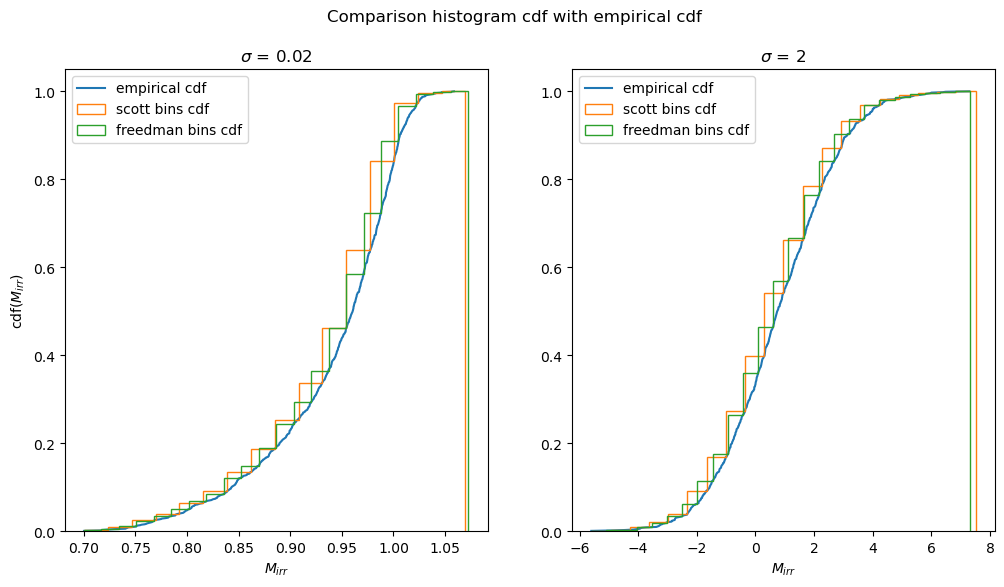

In [4]:
cdf_m_irr_1 = np.arange(1, len(m_irr_1) + 1) / len(m_irr_1)
cdf_m_irr_2 =  np.arange(1, len(m_irr_2) + 1) / len(m_irr_2)

fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].plot(np.sort(m_irr_1), cdf_m_irr_1, label = 'empirical cdf')
hist(m_irr_1, bins = 'scott',density = True, histtype = 'step', label = 'scott bins cdf', cumulative = True, ax = ax[0])
hist(m_irr_1, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins cdf',cumulative = True, ax = ax[0])
ax[0].set_xlabel(r'$M_{irr}$')
ax[0].legend()
ax[0].set_ylabel(r'cdf($M_{irr}$)')
ax[0].set_title(r'$\sigma$ = ' +str(sigma[0]))#plt.show()

ax[1].plot(np.sort(m_irr_2),cdf_m_irr_2, label = 'empirical cdf')
hist(m_irr_2, bins = 'scott',density = True, histtype = 'step', label = 'scott bins cdf', cumulative = True, ax = ax[1])
hist(m_irr_2, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins cdf',cumulative = True, ax = ax[1])
plt.legend()
plt.xlabel(r'$M_{irr}$')
ax[1].set_title(r'$\sigma$ = ' +str(sigma[1]))
plt.suptitle('Comparison histogram cdf with empirical cdf')
plt.show()

#### 2.3 $f$ distribution

We analyze the $f$ distribution, obtained from the spin $\chi$.

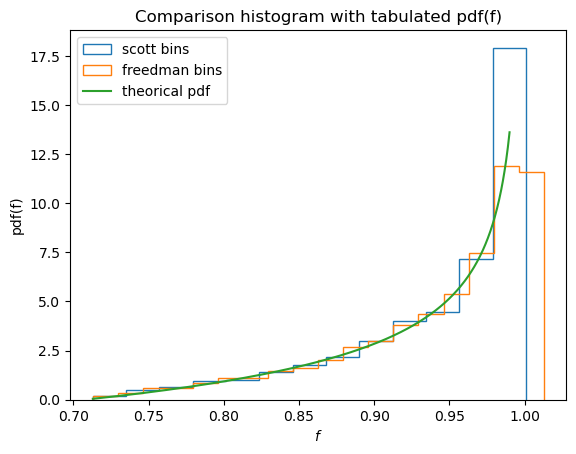

In [5]:
f = np.sqrt((1+np.sqrt(1-chi**2))/2) 
hist(f, bins = 'scott',density = True, histtype = 'step', label = 'scott bins')
hist(f, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins')

f_lin = np.linspace(min(f),0.99, 1000)
ax = plt.gca()
ax.plot(f_lin, 2*(2*f_lin**2-1)/(np.sqrt(1-f_lin**2)), label = 'theorical pdf')
plt.xlabel(r'$f$')
plt.ylabel(r'pdf(f)')
plt.legend()
plt.title('Comparison histogram with tabulated pdf(f)')
plt.show()

#### 2.4 $f$ CDF

We can also compute the CDF of $f$.

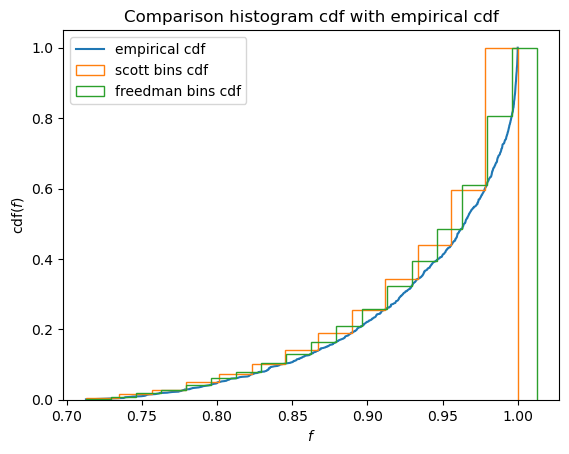

In [6]:
ax = plt.gca()
cdf_f = np.arange(1, len(f) + 1) / len(f)
plt.plot(np.sort(f),cdf_f, label = 'empirical cdf')
plt.hist(f, bins = 'scott',density = True, histtype = 'step', label = 'scott bins cdf', cumulative = True)
hist(f, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins cdf', cumulative = True)
plt.legend()
plt.xlabel(r'$f$')
plt.ylabel(r'cdf($f$)')
plt.title('Comparison histogram cdf with empirical cdf')
plt.show()

#### 2.5 Comparison between cdf(f), cdf($M_{irr}$)

Once we obtained both CDFs, we can compare them for both cases ($\sigma = 0.02, 2$)

Caso con σ = 0.02:
KstestResult(statistic=0.011206235011990407, pvalue=0.9999999779169205, statistic_location=0.269, statistic_sign=-1)
Caso con σ = 2.00:
KstestResult(statistic=0.495, pvalue=1.2921449704726963e-111, statistic_location=0.728846501888964, statistic_sign=1)


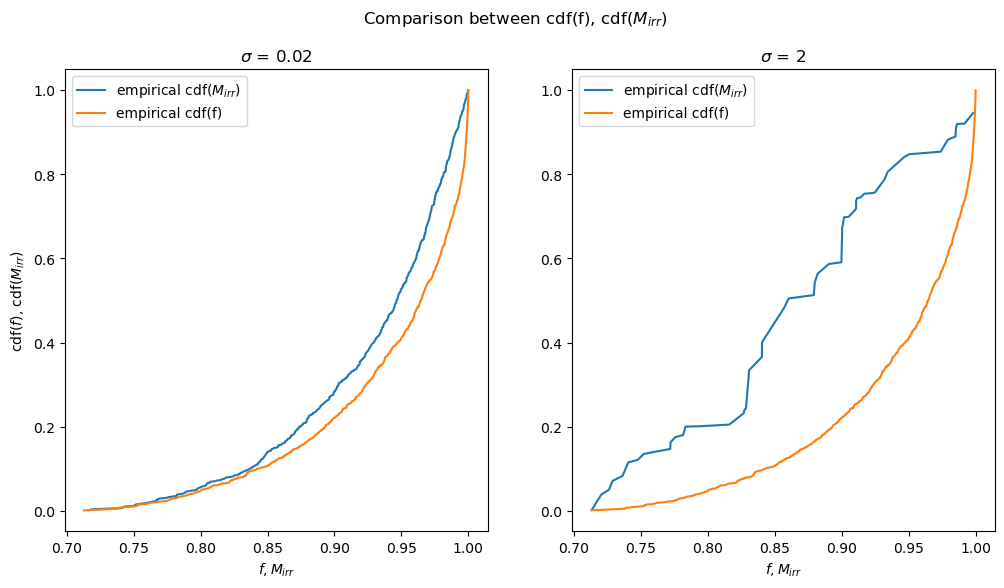

In [7]:
fig, ax = plt.subplots(1,2, figsize = (12, 6))

ax[0].plot(np.sort(m_irr_1[(m_irr_1 > min(f)) & (m_irr_1 < max(f))]),cdf_m_irr_1[(m_irr_1 > min(f)) & (m_irr_1 < max(f))], label = r'empirical cdf($M_{irr}$)')
ax[0].plot(np.sort(f),cdf_f, label = 'empirical cdf(f)')
ax[0].set_xlabel(r'$f, M_{irr}$')
ax[0].set_ylabel(r'cdf($f$), cdf($M_{irr}$)')
ax[0].set_title(r'$\sigma$ = ' +str(sigma[0]))
ax[0].legend()
print('Caso con σ = %.02f:' %sigma[0])
print(scipy.stats.ks_2samp(cdf_m_irr_1[(m_irr_1 > min(f)) & (m_irr_1 < max(f))], cdf_f))

ax[1].plot(np.sort(m_irr_2[(m_irr_2 > min(f)) & (m_irr_2 < max(f))]),cdf_m_irr_2[(m_irr_2 > min(f)) & (m_irr_2 < max(f))], label = r'empirical cdf($M_{irr}$)')
ax[1].plot(np.sort(f),cdf_f, label = 'empirical cdf(f)')
ax[1].set_xlabel(r'$f, M_{irr}$')
ax[1].set_title(r'$\sigma$ = ' +str(sigma[1]))
plt.suptitle('Comparison between cdf(f), cdf($M_{irr})$')
ax[1].legend()
print('Caso con σ = %.02f:' %sigma[1])
print(scipy.stats.ks_2samp(m_irr_2, f));

#### 2.6 Comparison between cdf(M), cdf($M_{irr}$)

Finally, we compare the $M$, $M_{irr}$ CDFs for both cases ($\sigma = 0.02, 2$).

Caso con σ = 0.02:
KstestResult(statistic=0.014360730593607306, pvalue=0.999993352606185, statistic_location=0.045, statistic_sign=1)
Caso con σ = 2.00:
KstestResult(statistic=0.0, pvalue=1.0, statistic_location=0.001, statistic_sign=1)


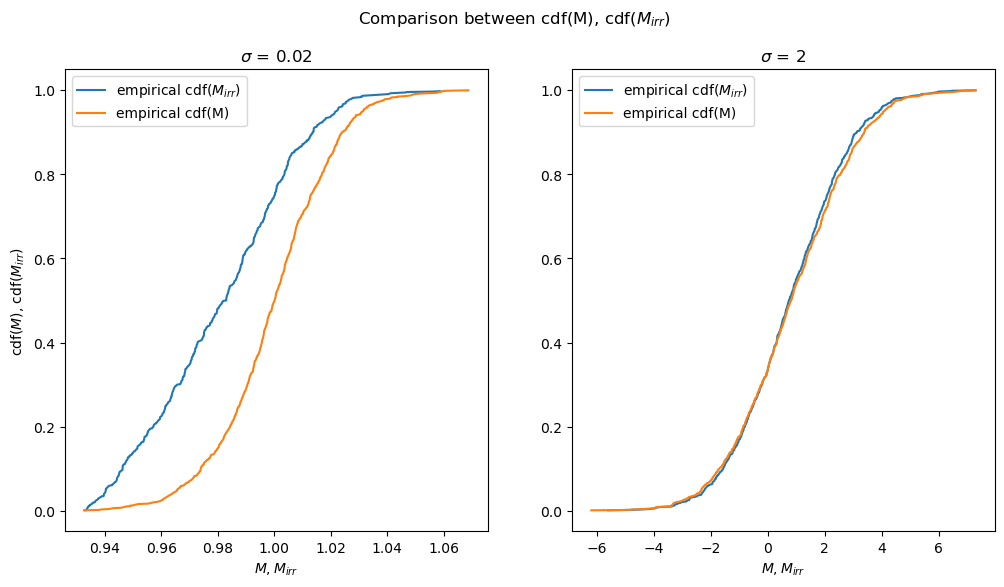

In [8]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].plot(np.sort(m_irr_1[(m_irr_1 > min(masses_1)) & (m_irr_1 < max(masses_1))]),cdf_m_irr_1[(m_irr_1 > min(masses_1)) & (m_irr_1 < max(masses_1))], label = r'empirical cdf($M_{irr}$)')
ax[0].plot(np.sort(masses_1),cdf_masses_1, label = 'empirical cdf(M)')
ax[0].set_xlabel(r'$M, M_{irr}$')
ax[0].set_ylabel(r'cdf($M$), cdf($M_{irr}$)')
ax[0].set_title(r'$\sigma$ = ' +str(sigma[0]))
ax[0].legend()
print('Caso con σ = %.02f:' %sigma[0])
print(scipy.stats.ks_2samp(cdf_m_irr_1[(m_irr_1 > min(masses_1)) & (m_irr_1 < max(masses_1))], cdf_masses_1))

ax[1].plot(np.sort(m_irr_2[(m_irr_2 > min(masses_2)) & (m_irr_2 < max(masses_2))]),cdf_m_irr_2[(m_irr_2 > min(masses_2)) & (m_irr_2 < max(masses_2))], label = r'empirical cdf($M_{irr}$)')
ax[1].plot(np.sort(masses_2),cdf_masses_2, label = 'empirical cdf(M)')
ax[1].set_xlabel(r'$M, M_{irr}$')
ax[1].set_title(r'$\sigma$ = ' +str(sigma[1]))
plt.suptitle('Comparison between cdf(M), cdf($M_{irr})$')
ax[1].legend()
print('Caso con σ = %.02f:' %sigma[1])
print(scipy.stats.ks_2samp(cdf_m_irr_2[(m_irr_2 > min(masses_2)) & (m_irr_2 < max(masses_2))], cdf_masses_2))


From these comparison, we can see that the distance between the $f$ and the $M_{irr}$ CDFs is less in the case of $\sigma = 0.02$. Instead, the $M$, $M_{irr}$ CDFs get closer when $\sigma = 2$. This is in agreement with the intuition we had at the start, for which $M_{irr}$ is distributed as $f$ if ${\sigma}\ll \mu$ or like $M$ if  $\sigma\gg \mu$.

### 3. Comparison with theorical probability

Now, I compare the distribution obtained from the samples with the theorical probability.

In [9]:
def probability(irr_m, s, mu):
    constant = np.sqrt(2/np.pi)/s
    p_value = scipy.integrate.quad(lambda x: np.exp(- (irr_m/x-mu)**2/(2*s**2))*(2*x**2-1)/(x*np.sqrt(1-x**2)), 1/np.sqrt(2), 1)[0]
    return constant*p_value

p_x_1 = []
for x in x_lin_1:
    p_x_1.append(probability(x, sigma[0], mean))

p_x_2 = []
for x in x_lin_2:
    p_x_2.append(probability(x, sigma[1], mean))

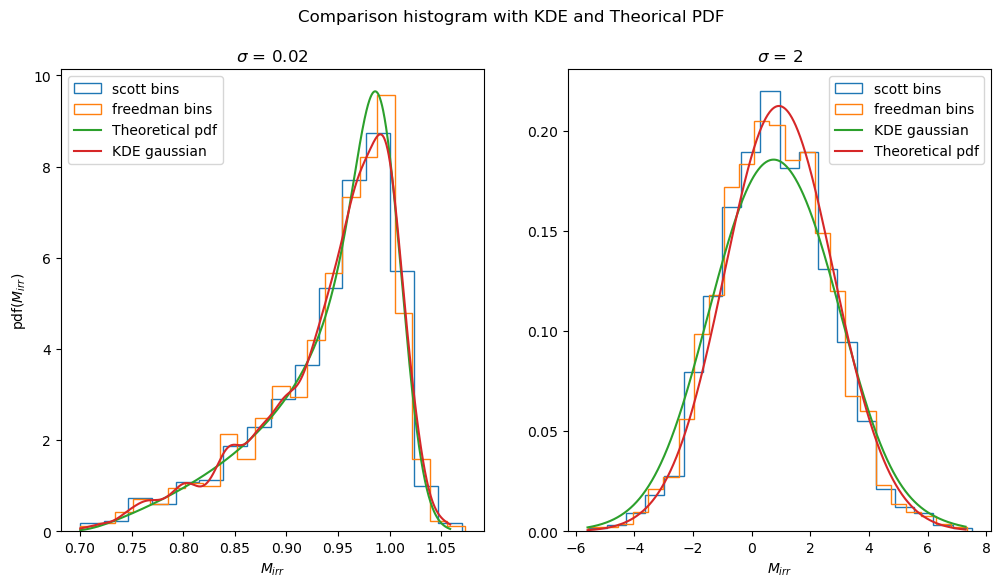

In [10]:
x_lin_1 = np.linspace(min(m_irr_1),max(m_irr_1), 1000)
fig, ax = plt.subplots(1,2, figsize = (12,6))
hist(m_irr_1, bins = 'scott',density = True, histtype = 'step', label = 'scott bins', ax = ax[0])
hist(m_irr_1, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins', ax = ax[0])
kde = KernelDensity(kernel="gaussian", bandwidth=0.01).fit(m_irr_1[:, np.newaxis])
log_pdf = kde.score_samples(x_lin_1[:, np.newaxis])
ax[0].plot(x_lin_1, p_x_1, label = 'Theoretical pdf')
ax[0].plot(x_lin_1, np.exp(log_pdf), label = 'KDE gaussian')
ax[0].set_xlabel(r'$M_{irr}$')
ax[0].set_ylabel(r'pdf($M_{irr}$)')
ax[0].set_title(r'$\sigma$ = ' +str(sigma[0]))
ax[0].legend()

x_lin_2 = np.linspace(min(m_irr_2),max(m_irr_2), 1000)
hist(m_irr_2, bins = 'scott',density = True, histtype = 'step', label = 'scott bins', ax = ax[1])
hist(m_irr_2, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins', ax = ax[1])
kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(m_irr_2[:, np.newaxis])
log_pdf = kde.score_samples(x_lin_2[:, np.newaxis])
ax[1].plot(x_lin_2, np.exp(log_pdf), label = 'KDE gaussian')
ax[1].plot(x_lin_2, p_x_2, label = 'Theoretical pdf')
plt.xlabel(r'$M_{irr}$')
plt.legend()
ax[1].set_title(r'$\sigma$ = ' +str(sigma[1]))
plt.suptitle('Comparison histogram with KDE and Theorical PDF')
plt.show()

### 4. KS distance of $M_{irr}$ with $f$ and $M$ as a function of $\sigma$

To measure if $M_{irr}$ is distributed more like $f$ and $M$ as a function of $\sigma$, we can compute the KS distance for different cases of $\sigma$, other than the one done before for visualization.

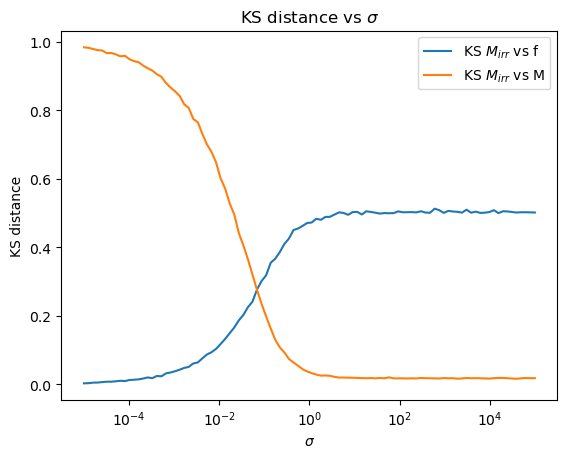

In [11]:
sigma_x = np.logspace(-5,5,100)
unif = scipy.stats.uniform()

dist_f = []
dist_M = []
for sigma in sigma_x:
    gauss = scipy.stats.norm(loc = 1, scale=sigma)
    unif = scipy.stats.uniform()
    chi = unif.rvs(10000)
    masses = gauss.rvs(10000)
    
    m_irr = masses*np.sqrt((1+np.sqrt(1-chi**2))/2)
    f = np.sqrt((1+np.sqrt(1-chi**2))/2) 
    dist_f.append(scipy.stats.ks_2samp(m_irr, f).statistic)
    dist_M.append(scipy.stats.ks_2samp(m_irr, masses).statistic)

fig, ax = plt.subplots()
ax.plot(sigma_x, dist_f, label = r'KS $M_{irr}$ vs f')
ax.plot(sigma_x, dist_M, label = r'KS $M_{irr}$ vs M')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'KS distance')
ax.set_xscale('log')
ax.legend()
ax.set_title('KS distance vs $\sigma$');

From the KS distance, we get the same results as before: $M_{irr}$ is distributed as $f$ if ${\sigma}\ll \mu$ or like $M$ if  $\sigma\gg \mu$.